In [2]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5, 0.5)
polygon = Polygon([(0, 0, 0), (0, 1, 2), (1, 1, 1), (1, 0, 1)])
print(polygon.contains(point))

True


In [ ]:
'''
@ algorithm 

Inside(Polyhedron P, point q)
   Segment S = [q, q+(0,0,1e30)]
   count = 0
   For each triangle T of P
      If Intersect(S,T)
            count = count + 1
      End if
   End for
   return odd(count)
End

Intersect([q1,q2],(t1,t2,t3))
  s1 = orient3d(q1,t1,t2,t3)
  s2 = orient3d(q2,t1,t2,t3)
  // Test whether the two extermities of the segment
  // are on the same side of the supporting plane of
  // the triangle
  If(s1 == s2) 
     return false
  End if
  // Now we know that the segment 'straddles' the supporing
  // plane. We need to test whether the three tetrahedra formed
  // by the segment and the three edges of the triangle have
  // the same orientation
  s3 = orient3d(q1,q2,t1,t2)
  s4 = orient3d(q1,q2,t2,t3)
  s5 = orient3d(q1,q2,t3,t1)
  return (s3 == s4 AND s4 == s5)
End

Orient3d(a,b,c,d)
  // Computes the sign of the signed volume  
  // of the tetrahedron (a,b,c,d)
  return Sign( dot(cross(b-a,c-a),d-a) )
End

'''


Matplotlib is building the font cache; this may take a moment.


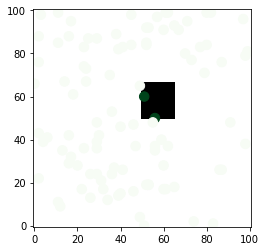

In [3]:
from matplotlib import path
import matplotlib.pyplot as plt
import numpy as np

first = -3
size  = (3-first)/100
xv,yv = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
p = path.Path([(0,0), (0, 1), (1, 1), (1, 0)])  # square with legs length 1 and bottom left corner at the origin
flags = p.contains_points(np.hstack((xv.flatten()[:,np.newaxis],yv.flatten()[:,np.newaxis])))
grid = np.zeros((101,101),dtype='bool')
grid[((xv.flatten()-first)/size).astype('int'),((yv.flatten()-first)/size).astype('int')] = flags

xi,yi = np.random.randint(-300,300,100)/100,np.random.randint(-300,300,100)/100
vflag = grid[((xi-first)/size).astype('int'),((yi-first)/size).astype('int')]
plt.imshow(grid.T,origin='lower',interpolation='nearest',cmap='binary')
plt.scatter(((xi-first)/size).astype('int'),((yi-first)/size).astype('int'),c=vflag,cmap='Greens',s=90)
plt.show()

In [ ]:
typedef struct {
   double x,y,z;
} XYZ;
#define EPSILON  0.0000001
#define MODULUS(p) (sqrt(p.x*p.x + p.y*p.y + p.z*p.z))
#define TWOPI 6.283185307179586476925287
#define RTOD 57.2957795

double CalcAngleSum(XYZ q,XYZ *p,int n)
{
   int i;
   double m1,m2;
   double anglesum=0,costheta;
   XYZ p1,p2;

   for (i=0;i<n;i++) {

      p1.x = p[i].x - q.x;
      p1.y = p[i].y - q.y;
      p1.z = p[i].z - q.z;
      p2.x = p[(i+1)%n].x - q.x;
      p2.y = p[(i+1)%n].y - q.y;
      p2.z = p[(i+1)%n].z - q.z;

      m1 = MODULUS(p1);
      m2 = MODULUS(p2);
      if (m1*m2 <= EPSILON)
         return(TWOPI); /* We are on a node, consider this inside */
      else
         costheta = (p1.x*p2.x + p1.y*p2.y + p1.z*p2.z) / (m1*m2);

      anglesum += acos(costheta);
   }
   return(anglesum);
}